In [101]:
import pandas as pd
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt

In [102]:
fit_data_xml = Path('converted_data/fit_data_xml.csv')

In [103]:
df = pd.read_csv(fit_data_xml)

In [104]:
df['date'][0].replace('T', ' ').split('.')[0].split(' ')[1].strip()

'17:35:00'

In [105]:
new_date = []
times = []
dates = df['date']
for date in dates:
    str_date = (date.replace('T', ' ').split('.')[0].split(' ')[0].strip())
    time_str = (date.replace('T', ' ').split('.')[0].split(' ')[1].strip())
    convert_date = datetime.strptime(str_date, "%Y-%m-%d")
    convert_time = datetime.strptime(time_str, "%H:%M:%S").time()
    new_date.append(convert_date)
    times.append(convert_time)

In [106]:
print(times[0])
print(new_date[0])

17:35:00
2017-12-13 00:00:00


In [107]:
df['date'] = new_date
df['time'] = times

In [108]:
df = df[['date', 'time', 'activity', 'calories', 'distance', 'intensity', 'total_time']]

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3354 entries, 0 to 3353
Data columns (total 7 columns):
date          3354 non-null datetime64[ns]
time          3354 non-null object
activity      3354 non-null object
calories      3229 non-null float64
distance      3229 non-null float64
intensity     3354 non-null object
total_time    3354 non-null float64
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 183.5+ KB


In [110]:
df.head()

,date,time,activity,calories,distance,intensity,total_time
0,2017-12-13,17:35:00,Running,63.513939,109.0,Active,360.000
1,2015-04-25,18:39:30,Walking,NaN,NaN,Active,973.528
2,2016-06-12,05:47:52,Walking,0.000000,415.0,Active,263.413
3,2016-06-12,05:53:04,Walking,NaN,NaN,Active,47.157
4,2016-06-12,05:56:31,Walking,0.000000,0.0,Active,238.403


## Data Types look good

In [111]:
#new_csv = Path('converted_data/fit_data.csv')
#df.to_csv(new_csv)

### Needed to remove Sleep data

In [112]:
df = df[df['activity'].str.startswith('Sleep') == False]
df['total_time'] = df['total_time'].apply(lambda x: x / 60)

In [113]:
df

,date,time,activity,calories,distance,intensity,total_time
0,2017-12-13,17:35:00,Running,63.513939,109.000000,Active,6.000000
1,2015-04-25,18:39:30,Walking,NaN,NaN,Active,16.225467
2,2016-06-12,05:47:52,Walking,0.000000,415.000000,Active,4.390217
3,2016-06-12,05:53:04,Walking,NaN,NaN,Active,0.785950
4,2016-06-12,05:56:31,Walking,0.000000,0.000000,Active,3.973383
...,...,...,...,...,...,...,...
3324,2014-11-04,21:42:34,Walking,0.000000,0.000000,Active,0.000000
3325,2018-09-08,17:50:16,Walking,112.122887,60.968331,Active,21.963883
3326,2017-12-15,14:40:00,Running,190.541824,141.000000,Active,18.000000
3327,2017-12-16,22:03:00,Running,74.099594,133.000000,Active,7.000000


In [114]:
pivot_df = pd.pivot_table(df,index=['date',], columns=['activity'], values=['total_time'], aggfunc=sum)

In [115]:
pivot_df

total_time                   
activity       Biking Running    Walking
date                                    
2014-11-01        NaN     NaN  16.411900
2014-11-02        NaN     NaN  30.506067
2014-11-03        NaN     NaN  15.350100
2014-11-04        NaN     NaN  17.925083
2014-11-07        NaN     NaN  18.721533
...               ...     ...        ...
2019-11-04        NaN     NaN  18.409330
2019-11-05  71.922717     NaN  22.872152
2019-11-06        NaN     NaN  25.845368
2019-11-11        NaN     NaN  23.110937
2019-11-12        NaN     NaN  45.068592

[691 rows x 3 columns]

In [116]:
pivot_date_start_date = datetime(2018, 1, 1)
pivot_end_date = datetime(2018, 5, 30)

In [117]:
filtered_pivot_df = pivot_df.loc[(pivot_df.index > pivot_date_start_date) & (pivot_df.index < pivot_end_date)]

In [118]:
filtered_pivot_df

total_time                       
activity       Biking    Running     Walking
date                                        
2018-01-02        NaN        NaN  311.679800
2018-01-03        NaN  27.000000   68.000000
2018-01-04        NaN  17.000000   27.000000
2018-01-05        NaN        NaN   96.250217
2018-01-06        NaN        NaN   82.575517
...               ...        ...         ...
2018-05-24        NaN        NaN   53.599983
2018-05-26        NaN  23.152283  171.294733
2018-05-27        NaN        NaN   18.519217
2018-05-28        NaN        NaN   78.738117
2018-05-29        NaN        NaN   52.803167

[106 rows x 3 columns]

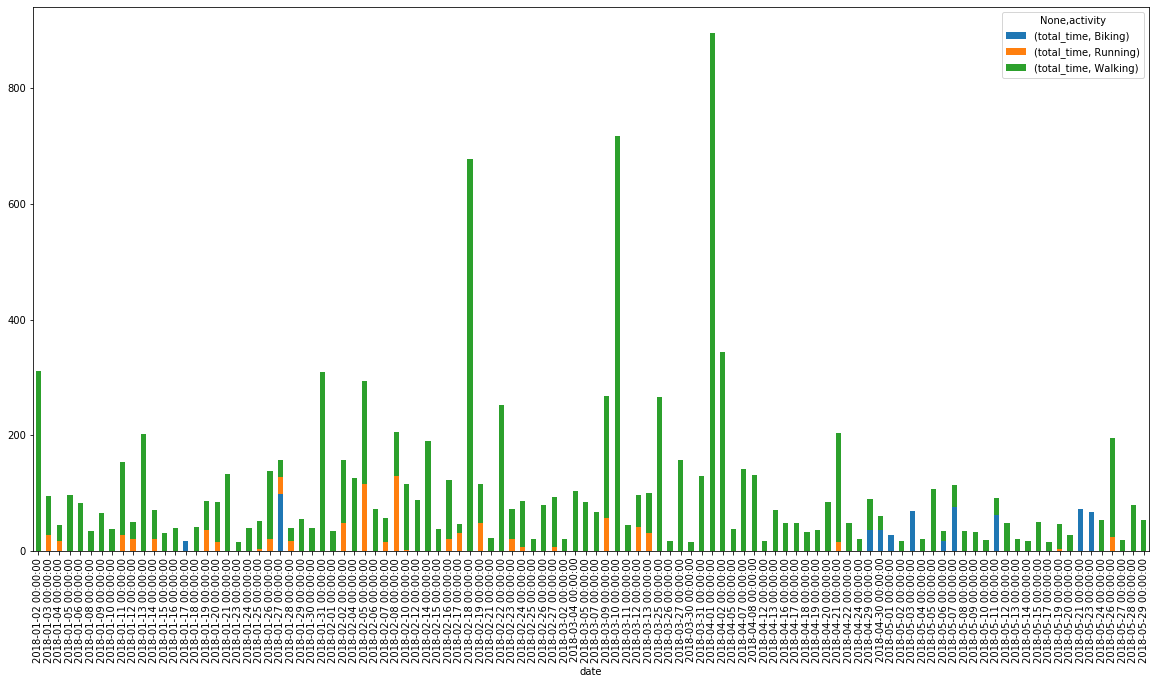

In [119]:
filtered_pivot_df.plot.bar(stacked=True, figsize=(20,10))

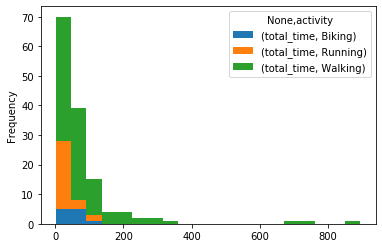

In [120]:
filtered_pivot_df.plot.hist(stacked=True, bins=20)

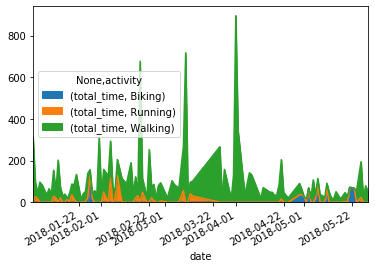

In [121]:
filtered_pivot_df.plot.area()